In [2]:
import numpy as np
import glob
from PIL import Image
import json

In [3]:
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
import PIL

In [7]:
img_dir_path = 'C:/Users/ejkan/Desktop/abdnominal_data/validation/dog/img'
img_name_list = os.listdir(img_dir_path)

In [8]:
print(len(img_name_list))

30295


In [9]:
print(img_name_list[:10])

['D_60_20120612_CM_0028_NOR_Ab07_20211221_0730.jpg', 'D_60_20120612_CM_0028_NOR_Ab08_20211120_0093.jpg', 'D_60_20120612_CM_0028_NOR_Ab09_20211221_0085.jpg', 'D_60_20120612_CM_0032_ABN_Ab09_20211217_1119.jpg', 'D_60_20120612_CM_0032_NOR_Ab08_20211228_0725.jpg', 'D_60_20120612_CM_0032_NOR_Ab09_20211224_3450.jpg', 'D_60_20120612_CM_0032_NOR_Ab09_20211224_3451.jpg', 'D_60_20120612_IF_0020_ABN_Ab10_20210124_0148.jpg', 'D_60_20120612_IF_0020_NOR_Ab01_20210124_0001.jpg', 'D_60_20120612_IF_0020_NOR_Ab01_20210127_0001.jpg']


In [10]:
json_dir_path = 'C:/Users/ejkan/Desktop/abdnominal_data/validation/dog/label'
json_name_list = os.listdir(json_dir_path)

In [11]:
print(len(json_name_list))

30295


In [12]:
print(json_name_list[:10])

['D_60_20120612_CM_0028_NOR_Ab07_20211221_0730.json', 'D_60_20120612_CM_0028_NOR_Ab08_20211120_0093.json', 'D_60_20120612_CM_0028_NOR_Ab09_20211221_0085.json', 'D_60_20120612_CM_0032_ABN_Ab09_20211217_1119.json', 'D_60_20120612_CM_0032_NOR_Ab08_20211228_0725.json', 'D_60_20120612_CM_0032_NOR_Ab09_20211224_3450.json', 'D_60_20120612_CM_0032_NOR_Ab09_20211224_3451.json', 'D_60_20120612_IF_0020_ABN_Ab10_20210124_0148.json', 'D_60_20120612_IF_0020_NOR_Ab01_20210124_0001.json', 'D_60_20120612_IF_0020_NOR_Ab01_20210127_0001.json']


In [13]:
def img_to_json_name(img_name):
    file_name = img_name.split('.')[0]
    json_name = file_name +'.json'
    return json_name

In [14]:
print(img_to_json_name(img_name_list[0]))

D_60_20120612_CM_0028_NOR_Ab07_20211221_0730.json


In [ ]:
x_data = []
y_data = []

In [24]:
def status_to_int(status):
    if status == 'NOR':
        int_status = 0
    else:
        int_status = 1
    return int_status

In [25]:
status_list = []
int_list = []

for img_name in img_name_list[:10]:
  json_path = json_dir_path + '/' + img_to_json_name(img_name)
  with open(json_path, 'r', encoding='utf-8') as f:
    data = json.load(f)
    status = data["metadata"]['Disease']
    status_list.append(status)
    int_list.append(status_to_int(status))

print(status_list)
print(int_list)



['NOR', 'NOR', 'NOR', 'ABN', 'NOR', 'NOR', 'NOR', 'ABN', 'NOR', 'NOR']
[0, 0, 0, 1, 0, 0, 0, 1, 0, 0]


In [23]:
print(int_list)

[None, None, None, None, None, None, None, None, None, None]


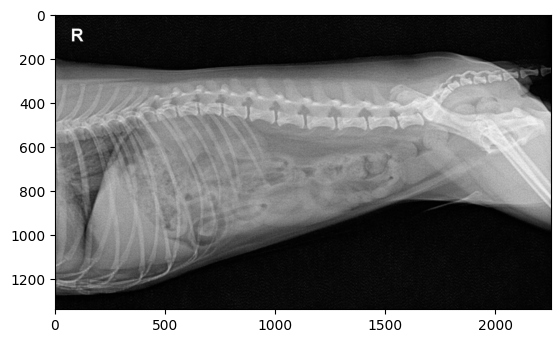

In [17]:
for img_name in img_name_list:
  img_path = img_dir_path + '/' + img_name
  img = PIL.Image.open(img_path)
  """
  plt.imshow(img)
  plt.show()
  break
  
  img = img.convert('RGB')
  img = img.resize((224, 224))
  np_img = np.array(img)
  np_img = np_img / 255.0
  x_data.append(np_img)

  # json에서 증상별 리스트 가져오기
  label_list = []
  json_path = json_dir_path + '/' + img_name_to_json_name(img_name)
  with open(json_path, 'r') as file:
    data = json.load(file)
    label_list = value_list_from_json(data)
    label_list = np.array(label_list)
    y_data.append(label_list)
"""

In [ ]:
import numpy as np

x_data = np.load('/content/drive/MyDrive/04_Scalp/data_to_numpy_224/x_data.npy')
y_data = np.load('/content/drive/MyDrive/04_Scalp/data_to_numpy_224/y_data.npy')

In [ ]:
# train/test 8:2 나누기
"""
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2)
"""

In [ ]:
"""
from tensorflow.keras import applications
import tensorflow as tf

base_model = tf.keras.applications.efficientnet.EfficientNetB0(include_top=False, weights = 'imagenet')

base_model.trainable = False

base_model.summary()
"""

In [ ]:
# pretrained model의 category와 유사하지 않다고 생각하여 전체 레이어를 동결 후 학습

# top <- false 이기 때문에 concatenate까지 하고 모델은 종료
# flatten 대신 GlobalAveragePooling2D()
"""
from tensorflow.keras import layers

flat_layer = layers.GlobalAveragePooling2D()(base_model.output)

output = layers.Dense(4, activation = 'softmax')(flat_layer)

import tensorflow as tf
model = tf.keras.models.Model(base_model.input, output)

model.summary()
"""

In [ ]:
"""
custom_adam = tf.keras.optimizers.Adam(learning_rate=0.001)

#fine tuning fit 

model.compile(optimizer=custom_adam, loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 30, batch_size = 32)
"""

In [ ]:
#model.save('/content/drive/MyDrive/04_Scalp/save_model_efficient_1/efficient_net1.h5')

In [ ]:
import matplotlib.pyplot as plt
"""
plt.plot(history.history['sparse_categorical_accuracy'], label = 'train_accuracy')
plt.plot(history.history['val_sparse_categorical_accuracy'], label = 'val_accuracy')
plt.legend()
""""""

In [ ]:
"""
plt.plot(history.history['loss'], label = 'train_loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend()
"""